In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_validate

In [ ]:
X,y = load_diabetes(as_frame=True, return_X_y=True)
X_train, X_vali, y_train, y_vali = train_test_split(X,y, test_size=0.20, random_state=0)
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [ ]:
def evaluateModel(model, X, y):
  pred = model.predict(X)
  mse = mean_squared_error(y, pred)
  r2 = r2_score(y, pred)
  return mse, r2

lr = LinearRegression()
lr.fit(X_train, y_train)
mse, r2 = evaluateModel(lr, X_train, y_train)
print("LR   - Train      - MSE: %7.2f R2: %5.3f"%(mse,r2))
mse, r2 = evaluateModel(lr, X_vali, y_vali)
print("LR   - Validation - MSE: %7.2f R2: %5.3f"%(mse,r2))
cv_results = cross_validate(lr, X, y, cv=5, scoring=('r2'))
print("LR   - Cross-Validation - R2: %5.3f"%(np.mean(cv_results['test_score'])))

LR   - Train      - MSE: 2734.73 R2: 0.554
LR   - Validation - MSE: 3424.32 R2: 0.332
LR   - Cross-Validation - R2: 0.482


In [ ]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
mse, r2 = evaluateModel(rf, X_train, y_train)
print("RF   - Train      - MSE: %7.2f R2: %5.3f"%(mse,r2))
mse, r2 = evaluateModel(rf, X_vali, y_vali)
print("RF   - Validation - MSE: %7.2f R2: %5.3f"%(mse,r2))
cv_results = cross_validate(rf, X, y, cv=5, scoring=('r2'))
print("RF   - Cross-Validation - R2: %5.3f"%(np.mean(cv_results['test_score'])))

#rf.get_params()

RF   - Train      - MSE:  456.59 R2: 0.926
RF   - Validation - MSE: 3769.47 R2: 0.265
RF   - Cross-Validation - R2: 0.423


In [ ]:
rf = RandomForestRegressor(random_state=0, oob_score=True)
rf.fit(X_train, y_train)
cv_results = cross_validate(rf, X, y, cv=5, scoring=('r2'))
print("RF   - Cross-Validation - R2: %5.3f"%(np.mean(cv_results['test_score'])))
print("RF   -                   OOB: %5.3f"%(rf.oob_score_))

RF   - Cross-Validation - R2: 0.423
RF   -                   OOB: 0.463


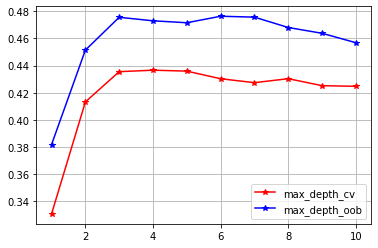

In [ ]:
r2_cv  = []
r2_oob = []
for i in range(1, 11):
  rf = RandomForestRegressor(max_depth=i, random_state=0, oob_score=True)
  cv_results = cross_validate(rf, X, y, cv=5, scoring=('r2'))
  r2_cv.append(  np.mean(cv_results['test_score']) )
  rf.fit(X_train, y_train)
  r2_oob.append( rf.oob_score_)
plt.plot(np.arange(1,len(r2_cv)+1),  r2_cv, "r*-", label='max_depth_cv')
plt.plot(np.arange(1,len(r2_oob)+1), r2_oob,"b*-", label='max_depth_oob')
plt.legend()
plt.grid()
plt.show()

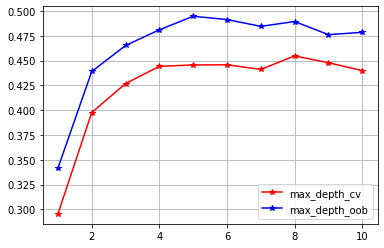

In [ ]:
r2_cv = []
r2_oob = []
for i in range(1, 11):
  rf = RandomForestRegressor(max_depth=i, max_features='sqrt', random_state=0, oob_score=True, n_estimators=100)
  cv_results = cross_validate(rf, X, y, cv=5, scoring=('r2'))
  r2_cv.append( np.mean(cv_results['test_score']) )
  rf.fit(X_train, y_train)
  r2_oob.append( rf.oob_score_)  
plt.plot(np.arange(1,len(r2_cv)+1), r2_cv,"r*-", label='max_depth_cv')
plt.plot(np.arange(1,len(r2_oob)+1), r2_oob,"b*-", label='max_depth_oob')
plt.legend()
plt.grid()
plt.show()

## XGBoost

In [ ]:
import xgboost as xgb

def evaluateModel(model, X, y, isgbm=False):
  if isgbm:
    dtest = xgb.DMatrix(X, label=y)
    pred = model.predict(dtest)
  else:
    pred = model.predict(X)
  mse = mean_squared_error(y, pred)
  r2 = r2_score(y, pred)
  return mse, r2

param = {}
param = {'max_depth':2}
num_round = 20
dtrain = xgb.DMatrix(X_train, label=y_train)
bst = xgb.train(param, dtrain, num_round)

# make prediction
#dtest = xgb.DMatrix(X_vali, label=y_vali)
#preds = bst.predict(dtest)

mse, r2 = evaluateModel(bst, X_train, y_train, isgbm=True)
print("BST   - Train      - MSE: %7.2f R2: %5.3f"%(mse,r2))
mse, r2 = evaluateModel(bst, X_vali, y_vali, isgbm=True)
print("BST   - Validation - MSE: %7.2f R2: %5.3f"%(mse,r2))



BST   - Train      - MSE: 1886.34 R2: 0.692
BST   - Validation - MSE: 3840.19 R2: 0.251


In [ ]:
def validacaoCruzadaXgb(X, y, param, num_round):
  kf = KFold(n_splits=5, shuffle=True, random_state=20)
  mse_cv = []
  r2_cv  = []

  for train_idx, vali_idx in kf.split(X):  
    dtrain = xgb.DMatrix(X.iloc[train_idx], label=y[train_idx])    
    bst = xgb.train(param, dtrain, num_round)

    dvali  = xgb.DMatrix(X.iloc[vali_idx],  label=y[vali_idx])
    pred = bst.predict(dvali)

    mse_cv.append( mean_squared_error(y[vali_idx], pred) )
    r2_cv.append( r2_score(y[vali_idx], pred) )
  
  return np.mean(mse_cv), np.mean(r2_cv)

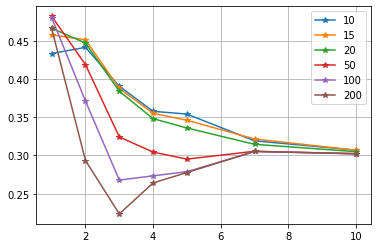

In [ ]:
d_list = [1,2,3,4,5,7,10]
for r in [10,15,20,50,100,200]:
  r2_cv  = []
  for d in d_list:
    param = {'max_depth':d}
    num_round = r
    mse, r2 = validacaoCruzadaXgb(X, y, param, num_round)
    r2_cv.append(  r2 )
  plt.plot(d_list,  r2_cv, "*-", label=r)
plt.legend()
plt.grid()
plt.show() 

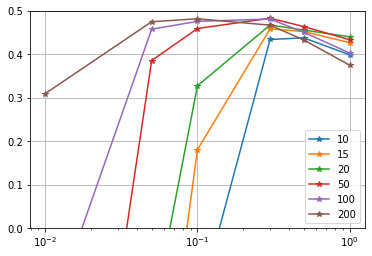

In [ ]:
e_list = [0.01, 0.05, 0.1, 0.3, 0.5, 1.0]
for r in [10,15,20,50,100,200]:
  r2_cv  = []
  for e in e_list:
    param = {'max_depth':1, 'eta':e}
    num_round = r
    mse, r2 = validacaoCruzadaXgb(X, y, param, num_round)
    r2_cv.append(  r2 )
  plt.plot(e_list,  r2_cv, "*-", label=r)
plt.legend()
plt.xscale('log')
plt.ylim(0, 0.5)
plt.grid()
plt.show() 

In [ ]:
### XGBoost - Scikit learn interface

In [ ]:
xgbr = xgb.XGBRegressor(n_estimators=100, max_depth=1, eta=0.1, objective='reg:squarederror')
xgbr.fit(X_train , y_train)
cv_results = cross_validate(xgbr, X, y, cv=5, scoring=('r2'))
print("RF   - Cross-Validation - R2: %5.3f"%(np.mean(cv_results['test_score'])))


RF   - Cross-Validation - R2: 0.445
